## Check Ant2 morphology rotation with inclusion of LMC.

In [1]:
## Plotting major axis (1sigma & 2sigma) on RA vs. Dec projection

In [2]:
from galpy.orbit import Orbit
from galpy.util import conversion
from galpy.potential import MWPotential2014, ChandrasekharDynamicalFrictionForce,HernquistPotential,MovingObjectPotential
from galpy.potential.mwpotentials import McMillan17
#from galpy.df import streamspraydf
from streamtools.df import streamspraydf
import numpy as np
import matplotlib.pyplot as plt

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old impo

In [60]:
pot = MWPotential2014

ro = conversion.get_physical(pot)['ro']
vo = conversion.get_physical(pot)['vo']
to = conversion.time_in_Gyr(ro=ro, vo=vo)
mo = conversion.mass_in_msol(ro=ro, vo=vo)

mass_ant = 10**7.92 #msol
scale = 1 #kpc
tdisrupt = 5

# from kinematics paper
ant2 = Orbit([143.8017, -36.6991, 131.8, -0.094, 0.103, 288.8], ro=ro, vo=vo, radec=True)
ant_unc = [0.0492, 0.08, 0, 0.007, 0.008, 0.4]
ant2.turn_physical_off()

# from pace data
ant2_ = Orbit.from_name('AntliaII', ro=ro, vo=vo)
ant2_.turn_physical_off()

In [25]:
from stream_package.stream_package import graphics

## Without LMC

In [35]:
oall, oleading, otrailing, dtall, dt, dtt = graphics.streamorbits(mass_ant, ant2, tdisrupt, pot=MWPotential2014, nstar=500)

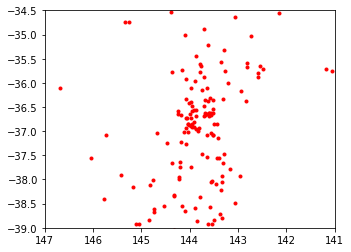

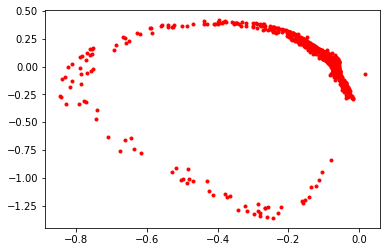

In [89]:
plt.plot(oall.ra(), oall.dec(), 'r.')
plt.axis('square')
#plt.plot(orbst_noLMC.ra(), orbst_noLMC.dec(), 'b.')
plt.xlim(147,141)
plt.ylim(-39, -34.5)
plt.show();

plt.plot(oall.pmra(), oall.pmdec(), 'r.')
#plt.plot(orbst_noLMC.pmra(), orbst_noLMC.pmdec(), 'b.')
plt.show()

## With LMC, no acceleration

In [37]:
o_lmc, oall_lmc, dtall_lmc = graphics.streamorbitslmc(mass_ant, ant2, tdisrupt, pot=MWPotential2014, nstar=500)

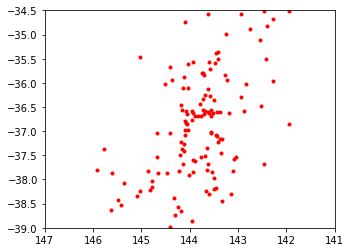

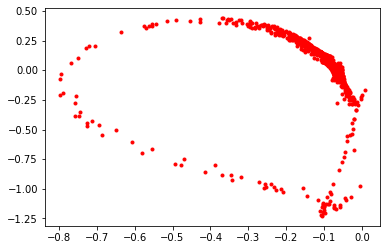

In [79]:
plt.plot(oall_lmc.ra(), oall_lmc.dec(), 'r.')
#plt.plot(orbst_noLMC.ra(), orbst_noLMC.dec(), 'b.')
plt.xlim(147,141)
plt.ylim(-39, -34.5)
plt.gca().set_aspect('equal')
plt.show();

plt.plot(oall_lmc.pmra(), oall_lmc.pmdec(), 'r.')
#plt.plot(orbst_noLMC.pmra(), orbst_noLMC.pmdec(), 'b.')
plt.show()

## With LMC & acceleration

In [39]:
o_lmca, oall_lmca, dtall_lmca = graphics.streamorbitslmc_acc(mass_ant, ant2, tdisrupt, pot=MWPotential2014, nstar=500)

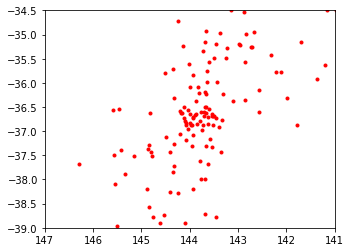

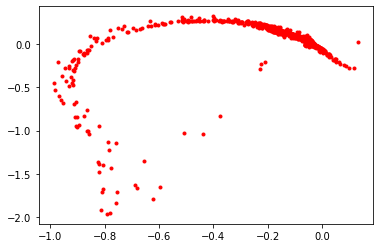

In [78]:
plt.plot(oall_lmca.ra(), oall_lmca.dec(), 'r.')
#plt.plot(orbst_noLMC.ra(), orbst_noLMC.dec(), 'b.')
plt.xlim(147,141)
plt.ylim(-39, -34.5)
plt.gca().set_aspect('equal')
plt.show();

plt.plot(oall_lmca.pmra(), oall_lmca.pmdec(), 'r.')
#plt.plot(orbst_noLMC.pmra(), orbst_noLMC.pmdec(), 'b.')
plt.show()

# Crater II

In [61]:
mass_cra = 10**6.74 #msol
#scale = 1 #kpc
tdisrupt = 5

# from kinematics paper
cra2 = Orbit([177.310, -18.413, 117.5, -0.073, -0.123, 89.3], ro=ro, vo=vo, radec=True)
cra_unc = [0, 0, 0, 0.021, 0.013, 0.3]
cra2.turn_physical_off()

# from pace data
cra2_ = Orbit.from_name('CraterII', ro=ro, vo=vo)
cra2_.turn_physical_off()

## Without LMC

In [62]:
coall, coleading, cotrailing, cdtall, cdt, cdtt = graphics.streamorbits(mass_cra, cra2, tdisrupt, pot=MWPotential2014, nstar=500)

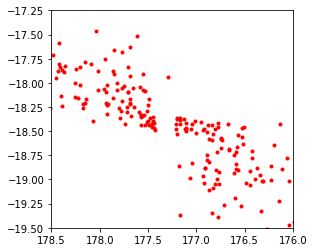

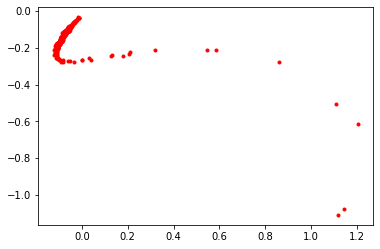

In [77]:
plt.plot(coall.ra(), coall.dec(), 'r.')
#plt.plot(orbst_noLMC.ra(), orbst_noLMC.dec(), 'b.')
plt.xlim(178.5,176)
plt.ylim(-19.5, -17.25)
plt.gca().set_aspect('equal')
plt.show();

plt.plot(coall.pmra(), coall.pmdec(), 'r.')
#plt.plot(orbst_noLMC.pmra(), orbst_noLMC.pmdec(), 'b.')
plt.show()

## With LMC, no acceleration

In [65]:
oc_lmc, coall_lmc, cdtall_lmc = graphics.streamorbitslmc(mass_cra, cra2, tdisrupt, pot=MWPotential2014, nstar=500)

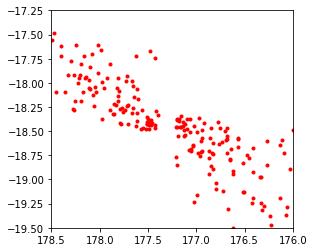

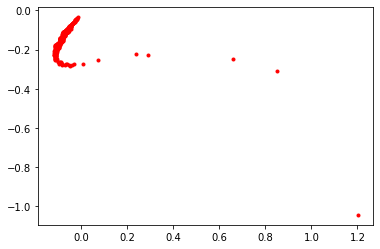

In [76]:
plt.plot(coall_lmc.ra(), coall_lmc.dec(), 'r.')
#plt.plot(orbst_noLMC.ra(), orbst_noLMC.dec(), 'b.')
plt.xlim(178.5,176)
plt.ylim(-19.5, -17.25)
plt.gca().set_aspect('equal')
plt.show();

plt.plot(coall_lmc.pmra(), coall_lmc.pmdec(), 'r.')
#plt.plot(orbst_noLMC.pmra(), orbst_noLMC.pmdec(), 'b.')
plt.show()

## With LMC & acceleration

In [67]:
oc_lmca, coall_lmca, cdtall_lmca = graphics.streamorbitslmc_acc(mass_cra, cra2, tdisrupt, pot=MWPotential2014, nstar=500)

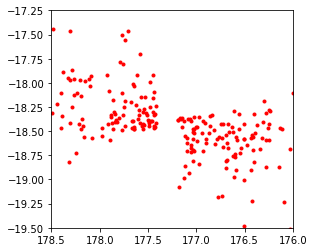

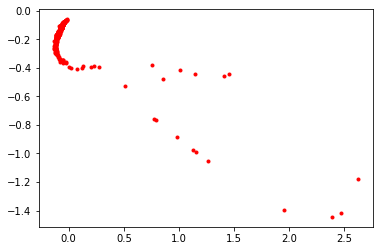

In [75]:
plt.plot(coall_lmca.ra(), coall_lmca.dec(), 'r.')
#plt.plot(orbst_noLMC.ra(), orbst_noLMC.dec(), 'b.')
plt.xlim(178.5,176)
plt.ylim(-19.5, -17.25)
plt.gca().set_aspect('equal')
plt.show();

plt.plot(coall_lmca.pmra(), coall_lmca.pmdec(), 'r.')
#plt.plot(orbst_noLMC.pmra(), orbst_noLMC.pmdec(), 'b.')
plt.show()

## Saving the stream data:

In [94]:
import pickle
#file_streams = open('antcra_stream.obj', 'wb')

streams_dict = {
    "Ant no LMC" : oall,
    "Ant LMC" : oall_lmc,
    "Ant LMC acc" : oall_lmca,
    "Cra no LMC" : coall,
    "Cra LMC" : coall_lmc,
    "Cra LMC acc" : coall_lmca
}

#pickle.dump(streams_dict, file_streams)
#file_streams.close()

In [ ]:
import pickle
filehandler = open('antcra_stream.obj', 'rb') 
obj = pickle.load(filehandler)

ant_stream = obj.get("Ant no LMC")
ant_streamlmc = obj.get("Ant LMC")
ant_streamlmca = obj.get("Ant LMC acc")
cra_stream = obj.get("Cra no LMC")
cra_streamlmc = obj.get("Cra LMC")
cra_streamlmca = obj.get("Cra LMC acc")